# MODÉLISER LA SÉGRÉGATION À PARTIR DU MODÈLE DE SCHELLING 
## Simon GENET et Marie-Olive THAURY
### *Projet de programmation 1A*
### *ENSAE Paris*
### *2022* 

"La ségrégation dans l'habitat n'est pas nouvelle, mais de plus en plus liée à une pénurie savante et à une spéculation chronique, elle tend à devenir décisive, tant par la ségrégation géographique (centre des villes et périphérie, zones résidentielles, ghettos de luxe et banlieue-dortoir, etc.) que dans l'espace habitable (intérieur et extérieur du logement), le dédoublement en résidence secondaire, etc. Les objets ont aujourd'hui moins d'importance que l'espace et le marquage social des espaces. L'habitat constitue peut-être ainsi une fonction inverse de celle des objets de consommation. Fonction homogénéisante des uns, fonction discriminante de l'autre, sous les rapports d'espace et de localisation."

*La Société de consommation* (1970), Jean Baudrillard, sociologue

## **Sommaire du projet**

* [Introduction](#first-bullet)
* [Importation des modules](#second-bullet)
* [I. Créer la ville](#third-bullet)
* [II. Simuler le phénomène de ségrégation sociale : modèle de Schelling](#fourth-bullet)
* [III. Influence du paramètre de tolérance sur le phénomène de ségrégation](#fifth-bullet)
* [Conclusion](#sixth_bullet)

Annexes : 
* [Bilan du projet](#seventh-bullet)
* [Documentation](#eighth-bullet)

## **Introduction**<a class="anchor" id="first-bullet"></a>

Dans le cadre de notre projet informatique, nous avons choisi de réaliser une modélisation de la ségrégation (sociale, ethnique ...) à partir du modèle de Schelling (1971). La ségrégation est un phénomène de répartition spatiale se caractérisant par une séparation des individus en fonction de leur groupe social, de leur revenu ou de leur ethnie ou encore de leur « race » (au sens anglo-saxon du terme). 

C'est un processus spatial observable dans l'ensemble des villes et largement documenté depuis notamment l'école de Chicago qui décrit un modèle de ségrégation concentrique dans les années 1920-1930 aux Etats-Unis (modèle de Burgess 1925). On le retrouve notamment dans les grandes villes européennes sous une séparation selon des critères sociaux et culturels (voir la représentation ci-dessous). Dans le cas de villes d'autres continents, un critère ethnique/communautaire peut s'ajouter dans cette ségrégation.



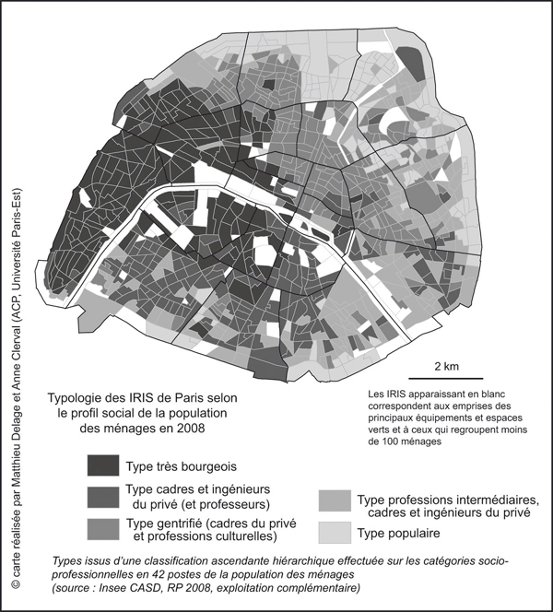


Exemple de ségrégation sociale à Paris (source : *Paris sans le peuple*, Anne Clerval, 2016, ed *La Découverte*) 

### Le Modèle de Schelling : 

C’est en 1971 que l’économiste états-unien Thomas Schelling (1921-2016) publie « Dynanmic Model of Segregation » dans le *Journal of Mathematical Sociology*. Dans cet article, Thomas Schelling développe pour la première fois sa théorie de la ségrégation non voulue à partir de l’analyse du partage de l’espace entre « races » aux Etats-Unis.  En partant de l’hypothèse que les habitants ont une « préférence » à vivre avec des personnes de même race, Thomas Schelling montre que même avec une légère préférence, un quartier peut devenir ségrégué bien que ce ne soit pas l’intention initiale des habitants.  Dès lors, il y aurait presque un caractère spontané à cette ségrégation. 

Le modèle commence par la génération d’un quartier non-ségrégué (à l’origine, Thomas Schelling utilise un échiquier et des pièces de cuivre). Les habitants ont un niveau de préférence à avoir des voisins de races différentes (exemple : sur $6$ voisins, je voudrais que $3$ aient au moins la même race que moi). Si les habitants ne sont pas satisfaits alors ils déménagent dans un logement vacant. Après plusieurs itérations, on obtient un quartier ségrégué. 

Des modèles de microéconomie géographique [1] prennent aujourd'hui en compte le calcul de l'utilité des ménages en introduisant les préférences communautaires (*communaunity-specific preference*), c'est-à-dire que l'utilité de l'habitant augmente si le ménage se situe dans un quartier de sa commmunauté. 


[1] par exemple, celui d'Edward Glaeser dans *Cities, Agglomeration and Spatial Equilibrium*, 2008





## **Importation des modules**<a class="anchor" id="second-bullet"></a>

In [1]:
import numpy as np
import random
from random import randint
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import unittest
import pandas as pd

## **I. Créer la ville** <a class="anchor" id="third-bullet"></a>

Le but de cette partie va être de générer aléatoirement une ville avec ses logements vacants, ses logements occupés (=les ménages) et leur groupe (social, ethnique, religieux...). 

On génère la ville à partir des paramètres suivants:
- le nombre de ménages $N$.
- le nombre minimal de logements vacants $n$.
- la liste `groups` contenant la proportion de chaque groupe. 

Nous chercherons tout d'abord à définir les dimensions de la ville en fonction du nombre total de logements, puis nous répartirons aléatoirement les logements vacants et les ménages des différents groupes dans la ville. 

Pour plus de détails quant aux différentes fonctions utilisées pour générer la ville, voir la section: [Documentation de la classe `city`](#ninth-bullet).

Vous trouverez notre test unitaire [ici](#tenth-bullet).

In [2]:
class city(object):
  '''A class to simulate the city with its vacants houses, its households and their group.'''

  def __init__(self, N, n, groups):
        self.N = N #maximum number of houselholds (= number of inhabitated houses)
        self.n = n #minimum number of vacant houses
        self.groups = groups #a list with the proportion of each group. The sum of groups[i] must be equal to 100

  '''First, we are looking for the dimensions of our city according to the total number of houses.'''
  def multiples(self):
    '''We are looking for the possible length and width of the city.''' 
    multiples = []
    p = self.N + self.n #number of houses wanted
    for i in range(1, p+1) : 
      if p%i == 0 :
        multiples.append(i)
    return multiples

  def city_dimensions(self):
    '''We are looking for the best length and width of the city so that it is as squared as possible.''' 
    tab = self.multiples() #the table with all possible dimensions
    dimensions = [tab[len(tab)//2], (self.N+self.n)//(tab[len(tab)//2])] #we take the multiple that is the most in the "middle", and the other multiple that corresponds to it
    if dimensions[1] < 3 : #we want the dimensions of our city to be at least equal to 3, so that we don't only have edges
      self.n += 1
      dimensions = self.city_dimensions()
    return dimensions

  '''Then we distribute randomly the vacant houses and the households with their group in the city.'''
  def city_matrix(self):
    '''We create the city with its vacants houses, its households and their group.'''
    city = []
    dimensions = self.city_dimensions()
    for i in range(self.n):  #we add the n vacant houses to our city
      city.append(0)
    for j in range(len(self.groups)): #we add for each group the chosen proportion of households
      for k in range(int((self.N*self.groups[j])/100)): 
        city.append(j+1)
    if len(city) != self.N + self.n : #since the proportion is not necessarily an integer, we add vacant houses
      for j in range(dimensions[0]*dimensions[1] - len(city)): #we add these vacant houses to our city
        city.append(0) #it does not really work for small cites but for big cities, we will obtain proportions that are close to the chosen proportions
    city = np.array(city)
    random.shuffle(city)
    city = city.reshape(dimensions)
    return city

Nous avons généré une première ville pour vérifier le bon fonctionnement de notre classe : 

In [ ]:
N = 1000
n = 200
groups = [25, 25, 25, 25]

town_class = city(N, n, groups)
town = town_class.city_matrix()
print(town)

[[1 0 4 ... 4 4 2]
 [4 0 0 ... 2 0 4]
 [2 0 4 ... 0 1 1]
 ...
 [4 3 4 ... 4 4 2]
 [4 0 0 ... 0 2 4]
 [2 2 0 ... 4 4 0]]


Nous avons ensuite créé une fonction `colored_city` pour renvoyer notre matrice en une matrice couleur.

Pour plus de détails sur cette fonction, voir la section: [Documentation de la fonction `colored_city`](#eleventh-bullet).

In [3]:
def colored_city(matrix, nb_figure, year) :
    
    fig = plt.figure(nb_figure)
    ax = plt.axes(xlim=(-0.5,np.shape(matrix)[1]-0.5), ylim=(-0.5,np.shape(matrix)[0]-0.5)) #we center the figure
  
    ax.set_xticklabels([]) #we take away the axis' numbers
    ax.set_yticklabels([])
    ax.set_aspect("equal")
    
    #We put the houses according to weither they are vacant or not, and if they are not vacant, according to their social class:
    cmap = ListedColormap(["white", "gold", "lawngreen", "pink","red", "darkorange","crimson","turquoise", "lavenderblush", "purple"])
    img = plt.imshow(matrix, cmap=cmap) 
    plt.title("année " + str(year))
    plt.draw()

Nous avons ensuite testé cette fonction sur une matrice : 

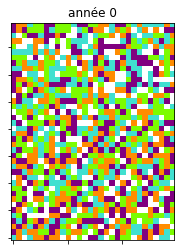

In [ ]:
N = 1000
n = 200
groups = [25, 25, 25, 25]

town_class = city(N, n, groups)
town = town_class.city_matrix()
colored_city(town, 0, 0)

#### Test unitaire :  <a class="anchor" id="tenth-bullet"></a>

Nous avons réalisé un test unitaire pour tester la validité de notre fonction `city_matrix`.

In [ ]:
class Test(unittest.TestCase) :

  def test_city_matrix(self):
    N = 1000
    n = 50
    groups = [50.34, 20, 29.66]
    nb_first = 0
    nb_second = 0
    nb_third = 0
    nb_vacant = 0
    city_test = city(N, n, groups).city_matrix()
    for i in range(np.shape(city_test)[0]):
      for j in range(np.shape(city_test)[1]):
        if city_test[i][j] == 0 :
          nb_vacant += 1
        elif city_test[i][j] == 1:
          nb_first += 1
        elif city_test[i][j] == 2:
          nb_second += 1
        else : 
          nb_third += 1
    self.assertEqual([nb_first, nb_second, nb_third, nb_vacant], [503, 200, 296, 51])
        
cl = Test()
cl.test_city_matrix()

## **II. Simuler le phénomène de ségrégation : modèle de Schelling** <a class="anchor" id="fourth-bullet"></a>

Le but de cette partie va être de simuler le phénomène de ségrégation sociale en simulant les mobilités des ménages, suite à une insatisfaction d'un ménage quant aux différents groupes de son voisinage. 

On simule le phénomène de ségrégation décrit par Schelling à partir des paramètres suivants:
- la matrice de la ville initiale `city`.
- le seuil de tolérance $\mu$. Plus $\mu$ est élevé, plus tolérants sont les habitants quant aux groupes de leurs voisins. Par exemple, si $\mu = 0.6$ alors les ménages n'acceptent pas d'avoir plus de $60\%$ de voisins d'un groupe différent. 
- le nombre d'années `nb_years` sur laquelle se déroule la simulation. 

Chaque semaine, on tire aléatoirement un ménage. Ce ménage évalue s'il est satisfait ou non de son logement actuel. Sa satisfaction dépend du nombre de voisins ${D}_{i}$ qui n'appartiennent pas au même groupe que lui. 

Si le ratio $\frac{{D}_{i}}{{D}_{i} + {S}_{i}}$ (où ${S}_{i}$ est le nombre de voisins qui appartiennent au même groupe que lui) ne dépasse pas le seuil de tolérance $\mu$, le ménage est satisfait, il décide de rester dans son logement actuel. 

Si le ratio $\frac{{D}_{i}}{{D}_{i} + {S}_{i}}$ dépasse strictement le seuil de tolérance $\mu$, le ménage n'est pas satisfait. On tire alors aléatoirement un logement vacant et le ménage réeffectue la même évaluation que précédemment pour le logement vacant. Si le ménage sera satisfait dans le logement vacant, il déménage dans ce logement là. Sinon, il reste dans son logement actuel. Ainsi, à la différence du modèle de Schelling initial, les ménages insatisfaits ne déménagent que s'ils trouvent un logement vacant satisfaisant. 

A la fin de l'année, on compte le nombre de déménagements. 

On réitère cette expérience sur plusieurs années et on observe comment la ville se ségrègue. 

Pour plus de détails quant aux différentes fonctions utilisées pour simuler le phénomène de ségrégation, voir la section: [Documentation de la classe `segregation`](#eleventh-bullet).

In [4]:
class segregation(object) : 
  '''A class to simulate the segregation phenomenon in our city.'''

  def __init__(self, city, mu, nb_years):
    self.city = city #our initial city
    self.mu = mu #the tolerance threshold
    self.nb_years = nb_years #number of years

  def unsatisfaction(self, i0, j0, i1, j1):
    '''We evaluate the neighborhood of a house (i1, j1) according to a household's group (i0, j0).'''
    city = self.city
    dimensions = np.shape(city)
    same, different = 0, 0 #the number of same and different households around the house (i1, j1) according to the household's group
    city[i0][j0], city[i1][j1] = city[i1][j1], city[i0][j0] #if we evaluate a vacant house's neighborhood, we do as if the vacant house is occupied by the household, and the household's current house is vacant
    for i in range(max(i1-1,0), min(i1+2, dimensions[0])) : #we browse the neighbors around the house (i1, j1); we pay attention to the edges 
      for j in range(max(j1-1, 0), min(j1+2, dimensions[1])): #we pay attention to the edges
        if city[i][j] != 0 :#we only take into account the households and not the vacant houses 
          if city[i][j] == city[i1][j1]: #if it is the same group
            same += 1
          else : #if it is not the same group
            different += 1
    city[i0][j0], city[i1][j1] = city[i1][j1], city[i0][j0] #we put back the city as it was before the evaluation
    if same + different == 1 : #the only household in the neighborhood is us i.e. there are only vacant houses in the neighborhood, so we are very happy because nobody is different from us. 
      return False #we are not unsatified
    else :
      return different/(same+different-1) > self.mu #if the evaluation is too high (compared to the threshold) i.e. there are to many households that are different from us in the neighborhood, we are unsatisfied

  def moves(self, nb_moving):
    '''We pick randomly a household. 
    If the household is not satisfied in its current house, we pick randomly a vacant house.
    If the household could be satisfied in the vacant house, it moves to it. If not, it stays in its current house.'''
    city = self.city
    dimensions = np.shape(city)
    i0 , j0 = randint(0,dimensions[0]-1), randint(0,dimensions[1]-1) #we pick randomly a household
    counter = 0
    while city[i0,j0] == 0 and counter < dimensions[0]*dimensions[1] : #we hope that after dimensions[0]*dimensions[1] researchs we will find a household
      i0 , j0 = randint(0,dimensions[0]-1), randint(0,dimensions[1]-1) 
      counter += 1
    if city[i0,j0] != 0 and self.unsatisfaction(i0, j0, i0, j0) : #if the household is not satisfied in its current house, it looks for a new house
      i1, j1 = randint(0,dimensions[0]-1), randint(0,dimensions[1]-1) #we pick randomly a vacant house
      counter = 0
      while city[i1,j1] != 0 and counter < dimensions[0]*dimensions[1] : #we hope that after dimensions[0]*dimensions[1] researchs we will find a vacant house
        i1, j1 = randint(0,dimensions[0]-1), randint(0,dimensions[1]-1)
        counter += 1
      if city[i1,j1] == 0 and not self.unsatisfaction(i0, j0, i1, j1) : #if the household evaluated that the new house could satisfy it, it moves to it. 
        city[i0][j0], city[i1][j1] = city[i1][j1], city[i0][j0]
        nb_moving += 1
    return nb_moving #the number of households who decided to move

  def segregation_one_year(self) :
    '''Every week, we repeat the previous experiment and we count how many households moved during the year.'''
    week = 1 #the week number 1 of the year
    nb_moving = 0 #the number of households who decided to move
    while week <= 52: #every week, one household wonders about weither it would move or not
      nb_moving = self.moves(nb_moving)
      week += 1
    return nb_moving #the total number of households who decided to move during the year
  
  def segregation_many_years(self, animation = False) :
    '''We repeat the previous experiment on many years.'''
    list_nb_moving = [] #a list containing for each year, how many households decided to move
    if animation : #we print the city on the first year
      colored_city(self.city, 0, 0)
    for j in range(1, self.nb_years+1): #the segregation every year during 'nb_years' years
      nb_moving = self.segregation_one_year()
      list_nb_moving.append(nb_moving)
    if animation : #we print the city on the last year
      colored_city(self.city, self.nb_years, self.nb_years)
    return list_nb_moving

### Réalisation de la ségrégation : 

Nous allons réaliser une ségrégégation à partir d'une ville d'au plus $1000$ habitants répartis de manière uniforme dans quatre groupes. Il y aura au moins $50$ logements vacants et nous itérons $1000$ fois. Le degré de tolérance sera de $0.7$. 


[8, 12, 14, 10, 7, 4, 6, 7, 8, 8, 6, 4, 7, 8, 6, 6, 8, 11, 11, 4, 10, 6, 4, 5, 7, 6, 2, 3, 5, 6, 10, 6, 9, 2, 3, 4, 3, 4, 3, 5, 5, 0, 4, 3, 2, 3, 4, 3, 3, 3, 1, 2, 5, 8, 2, 6, 3, 3, 3, 6, 4, 5, 4, 4, 3, 4, 3, 2, 1, 2, 5, 2, 2, 2, 5, 2, 3, 2, 3, 3, 1, 2, 3, 5, 5, 1, 1, 5, 4, 3, 3, 2, 2, 3, 0, 2, 2, 5, 2, 2, 1, 3, 2, 1, 0, 3, 0, 2, 1, 3, 3, 0, 0, 0, 2, 1, 1, 3, 0, 0, 3, 1, 3, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

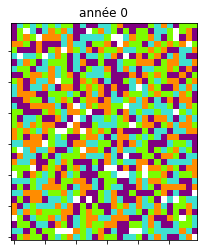

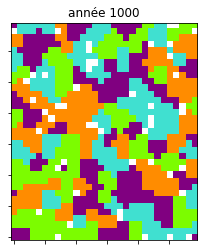

In [ ]:
N = 1000
n = 50
groups = [25, 25, 25, 25]

town_class = city(N, n, groups)
town = town_class.city_matrix()

mu = 0.7
nb_years = 1000

segregation_class = segregation(town, mu, nb_years)
print(segregation_class.segregation_many_years(True))

**Commentaire des résultats :** Nous avons réussi à partir d'une ville mélangée à la ségréguer. En effet, nous remarquons la formation de tâches de couleur ce qui montre le regroupement par groupe des ménages. Les logements vacants sont représentés par la couleur blanche. On en trouve notamment aux «frontières» des zones ségréguées comme cela était attendu. En effet, les individus à la frontière vont échanger avec les logements vacants situés au centre des zones. 

## **III. Influence du paramètre de tolérance sur le phénomène de ségrégation** <a class="anchor" id="fifth-bullet"></a>

Le but de cette partie va être d'observer comment le paramètre de tolérence influe sur le phénomène de ségrégation et notamment trouver pour quels seuils, la ségrégation est la plus forte.

Plus le nombre de déménagements est élevé, plus la ségrégation est forte. En effet, une fois qu'une personne déménage, elle est satisfaite de son nouveau voisinage, donc elle ne cherchera plus à déménager (à moins évidemment que son voisinage change complètement). 

Pour déterminer l'influence du paramètre de tolérance sur le niveau de ségrégation sociale, on cherche donc en fonction de $\mu$, le nombre total de déménagements qui ont eu lieu avant d'atteindre l'état stationnaire.

Il nous faut d'abord déterminer l'état stationnaire, puis étudier la stabilité de notre modèle pour savoir s'il suffit de faire nos statistiques sur une seule ville ou s'il faut faire nos statistiques sur une «moyenne» de plusieurs villes. Enfin, nous déterminerons le nombre d'années sur lesquelles on fera la simulation.

Dans toute cette partie, on appliquera notre modèle sur une ville typique paramétrée de la manière suivante : $N=1000$, $n=50$ et
`groups` $=[25, 25, 25, 25]$.


### Préliminaires : 


#### Trouver l'état stationnaire : 

Nous avons réalisé une fonction qui renvoie l'état stationnaire. Cet état stationnaire désigne la dernière année où il y a eu un déménagement. Cet état reste une approximation car dans certain cas, il peut y avoir des déménagements encore possibles mais qui ne se font pas en raison du caractère aléatoire de notre modèle. Néanmoins, lorsque que l'on fait tourner la simulation sur un nombre assez conséquent d'années, il en est un bon indicateur donnant la date à laquelle la ville a été quasiment totalement ségréguée. 

Pour plus de détails sur cette fonction, voir la section: [Documentation de la fonction `find_stationary`](#eleventh-bullet).

In [ ]:
def find_stationary(list_nb_moving) : 
  ''' We are looking the last year in which households moved that corresponds to the stationary state'''
  moving_years = [] #a list containing all the years in which households moved
  for a in range(len(list_nb_moving)) :
    if list_nb_moving[a] != 0 : 
      moving_years.append(a)
  if len(moving_years) == 0 : 
    stationary = 0 
    #print("L'état stationnaire est atteint dès l'année initiale'")
  elif len(moving_years) == len(list_nb_moving) : 
    stationary = -1
    #print("L'état stationnaire n'est pas atteint")
  else :
    stationary = moving_years[-1]
    #print("Le stationnaire est atteint à la " + str(stationary) + "ième année")
  return stationary

#### Stabilité du modèle :

Nous testons ensuite la stabilité de notre modèle pour différents seuils de tolérance $\mu$, sur $5$ villes paramétrées comme défini ci-dessus. Cela nous permettra de savoir s'il suffit de faire nos statistiques sur une seule ville ou s'il faut faire nos statistiques sur une «moyenne» de plusieurs villes. 

In [ ]:
N = 1000
n = 50
mu_valors = np.linspace(0, 1, 11)
groups = [25, 25, 25, 25]
years = 5000
nb_city = 5

for mu in mu_valors :
  table = []
  nb_moving_mu = []
  stationary_mu = []
  for i in range(nb_city) : 
    town = city(N, n, groups).city_matrix()
    list_nb_moving = segregation(town, mu, years).segregation_many_years()
    nb_moving = np.sum(list_nb_moving) 
    nb_moving_mu.append(nb_moving)
    stationary = find_stationary(list_nb_moving)
    stationary_mu.append(stationary)
    table.append(mu)
    table.append(nb_moving)
    table.append(stationary)
  print('Pour mu =', mu, ':')
  table = np.array(table)
  table = np.reshape(table,(nb_city, 3))
  df = pd.DataFrame(table, columns = ["seuil de tolérance", "nombre de déménagements", "état stationnaire"])
  print(df)
  print('Pour mu =', mu, '''l'écart type des nombres de déménagements est''', np.std(nb_moving_mu), 'déménagements.')
  print(' ')


Pour mu = 0.0 :
   seuil de tolérance  nombre de déménagements  état stationnaire
0                 0.0                      0.0                0.0
1                 0.0                      0.0                0.0
2                 0.0                      0.0                0.0
3                 0.0                      0.0                0.0
4                 0.0                      0.0                0.0
Pour mu = 0.0 l'écart type des nombres de déménagements est 0.0 déménagements.
 
Pour mu = 0.1 :
   seuil de tolérance  nombre de déménagements  état stationnaire
0                 0.1                      0.0                0.0
1                 0.1                      0.0                0.0
2                 0.1                      0.0                0.0
3                 0.1                      0.0                0.0
4                 0.1                      1.0                3.0
Pour mu = 0.1 l'écart type des nombres de déménagements est 0.4 déménagements.
 
Pour mu = 0.2 

Pour chaque seuil de tolérance $\mu$, nous remarquons que l'écart type du nombre de déménagements n'est pas trop élevé relativement au nombre de déménagements possibles. Nous en concluons donc que le modèle est relativement stable. 

Nous observons que l'écart-type du nombre de déménagements est plus grand pour les valeurs de $\mu \in \left\{0.6, 0.7\right\}$, ce qui s'explique par le fait qu'il y a plus de déménagements et donc une plus grande dépendance au caractère aléatoire de notre modèle. 


Pour être certains de la validité de nos valeurs, nous allons donc réaliser la moyenne sur $10$ villes pour éviter des situtations extrêmes. 

#### Nombres d'années de la simulation : 

Nous cherchons ici le nombre d'années sur lesquelles il faut réaliser la simulation. 

D'après les tableaux présentés ci-dessus, l'état stationnaire est au pire atteint au bout de la ${975}^{ième}$ année. Il faudrait donc simuler pendant au moins pendant $1000$ ans le phénomène de ségrégation sociale pour être sûr de prendre en compte tous les déménagements. 

Or, on observe sur les graphiques ci-dessous (nombre de déménagements en fonction de l'année pour plusieurs $\mu$) que les $100$ premières années sont déjà révélatrices d'un niveau élevé ou non de ségrégation. En effet, le nombre de déménagements par année tend à décroitre au fil des années de manière relativement uniforme pour chaque $\mu$. Ainsi, si pour un ${\mu}_{0}$, la ségrégation est plus forte lors des $100$ premières années que pour un ${\mu}_{1}$, elle le sera aussi pour les $900$ dernières années. Il est donc suffisant de ne s'intéresser qu'aux $100$ premières années de la simulation ce qui nous permet par ailleurs de réduire drastiquement le temps d'exécution de notre code. 

Pour mu = 0.0


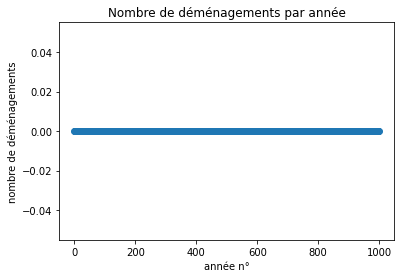

Pour mu = 0.1


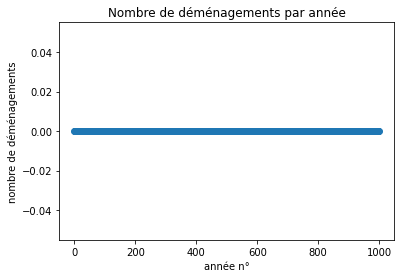

Pour mu = 0.2


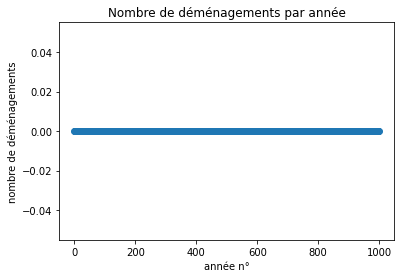

Pour mu = 0.30000000000000004


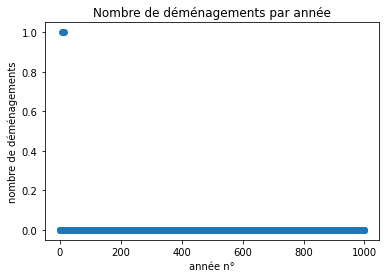

Pour mu = 0.4


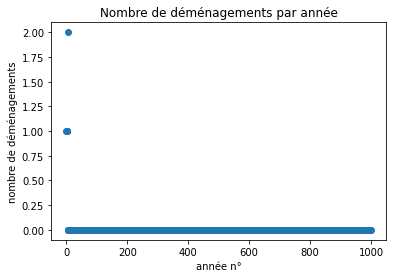

Pour mu = 0.5


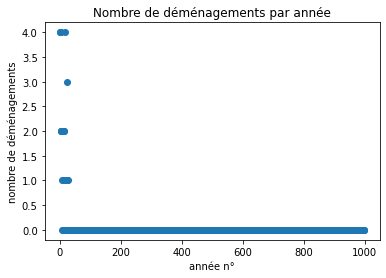

Pour mu = 0.6000000000000001


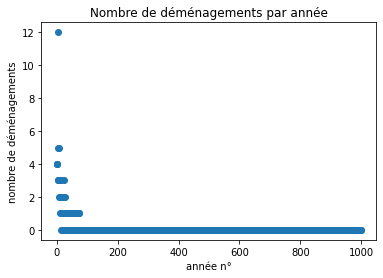

Pour mu = 0.7000000000000001


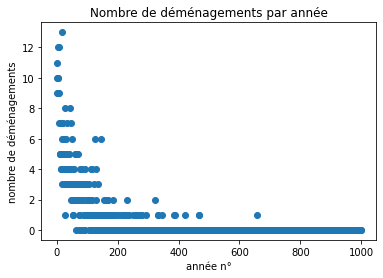

Pour mu = 0.8


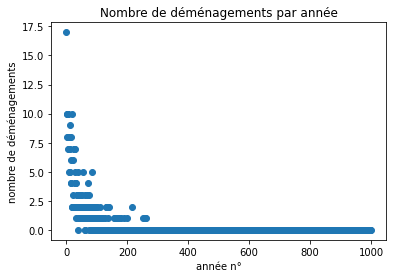

Pour mu = 0.9


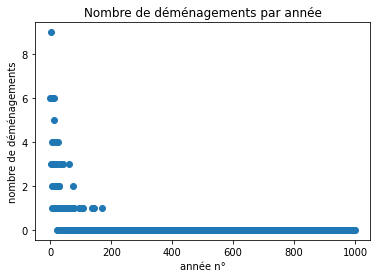

Pour mu = 1.0


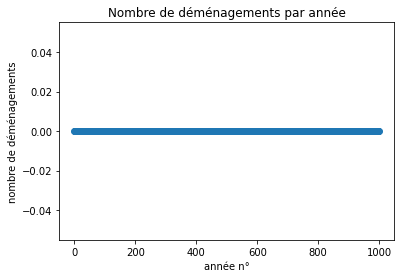

In [ ]:
N = 1000
n = 50
mu_valors = np.linspace(0, 1, 11)
groups = [25, 25, 25, 25]
years = 1000

for mu in mu_valors : 
  town = city(N, n, groups).city_matrix()
  list_nb_moving = segregation(town, mu, years).segregation_many_years()
  print('Pour mu =', mu)
  plt.title('Nombre de déménagements par année')
  plt.xlabel('année n°')
  plt.ylabel('nombre de déménagements')
  plt.scatter([i for i in range(len(list_nb_moving))],list_nb_moving)
  plt.show()

### Influence du paramètre de tolérance sur le niveau de ségrégation :  


On décide donc de tracer en fonction de $\mu$, le nombre total de déménagements qui ont eu lieu durant les $100$ premières années de la simulation.
On estime pour chaque $\mu$, le nombre total de déménagements par une moyenne sur $10$ villes de leur nombre total de déménagements. 

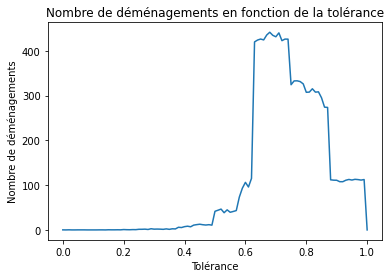

In [ ]:
N = 1000
n = 50
mu_valors = np.linspace(0, 1, 101)
groups = [25, 25, 25, 25]
years = 100

means_nb_moving = []
for mu in mu_valors :
  nb_moving_mu = []
  for i in range(10):
    town = city(N, n, groups).city_matrix()
    nb_moving_mu.append(np.sum(np.array(segregation(town, mu, years).segregation_many_years())))
  means_nb_moving.append(np.mean(nb_moving_mu))

plt.plot(mu_valors, means_nb_moving)
plt.title('Nombre de déménagements en fonction de la tolérance')
plt.xlabel('Tolérance')
plt.ylabel('Nombre de déménagements')
plt.show()

In [ ]:
table = np.array([mu_valors[60:80], means_nb_moving[60: 80]])
df = pd.DataFrame(np.transpose(table), columns = ["Tolérance", "Nombre de déménagements"])
df

,Tolérance,Nombre de déménagements
0,0.60,106.2
1,0.61,95.9
2,0.62,115.1
3,0.63,419.9
4,0.64,424.1
5,0.65,426.3
6,0.66,424.4
7,0.67,435.3
8,0.68,441.5
9,0.69,434.6


On observe clairement que pour $\mu \in [0.63, 0.74]$ le nombre de déménagements atteint un *pic* c'est-à-dire que la ségrégation est la plus forte pour ces valeurs.

En deça de $0.63$, le seuil de tolérance est trop bas, donc les ménages sont rarement satisfaits de leur logement futur : ils ne déménagent que rarement et donc la ségrégation opère peu. 

De manière similaire, au-delà de $0.74$, le seuil de tolérance est trop élevé donc les ménages sont souvent satisfaits de leur logement actuel : ils cherchent peu à déménager et, idem, la ségrégation opère peu. 

## **Conclusion** <a class="anchor" id="sixth-bullet"></a>


Nous avons, dans un premier temps, réussi à générer une ville mélangée. Puis, dans un second temps, nous avons ségrégué la ville initiale et nous avons pu observer le phénomène de ségrégation. Au niveau numérique, nous avons étudié la stabilité de notre modèle pour ensuite trouver pour quels degrès de tolérance, la ségrégation est la plus forte.

### Validité empirique du modèle

Le modèle de Schelling que nous avons programmé permet de représenter de manière plutôt réaliste la ségrégation raciale et sociale. En effet, comparons les résultats que nous obtenons avec les cartes de la ségrégation spatiale à New York, Londres et Tokyo dans les années 1980's.

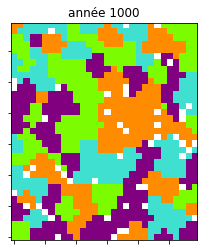

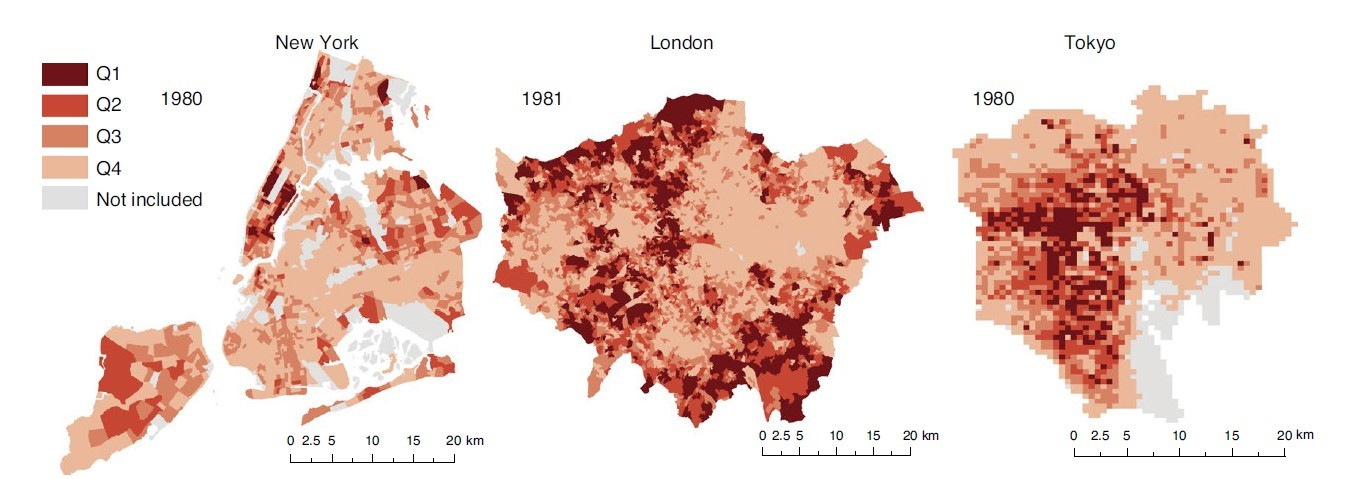

source : https://go.nature.com/2EK8RnK


La population est répartie selon quatre classes sociales différentes. On remarque la formation de zones dans notre modèle qui ressemblent à celles présentes dans ces villes notamment pour Londres et Tokyo. Dès lors, on peut conclure que le modèle que nous avons réalisé permet globalement d'obtenir le résultat attendu. 

**Limites du modèle :** 

Cependant, nous pouvons faire quelques critiques à notre modèle et plus généralement au modèle de Schelling. En effet, si le modèle de 1971 permet bien d’expliquer la ségrégation raciale ou sociale, il souffre malgré tout de quelques biais [2] notamment du fait que les villes sont générées aléatoirement ce qui rend le modèle très peu probable. En effet, selon Forsé et Parodi, le modèle de Schelling survaloriseraient la création de quartiers homogènes qui ne pourraient pas décroître. 

De plus, d’autres causes responsables de la ségrégation sociale ne sont pas prises en compte dans le modèle comme par exemple le prix de l'immobilier ou encore les politiques publiques qui peuvent favoriser la ségrégation spatiale comme à New York. 


Quant à notre modèle, évidemment abstrait, il ne rend pas compte de certaines dynamiques de la ségrégation spatiale. Ainsi, notre modèle ne fait pas une hiérarchie des classes sociales entre elles, or on remarque dans le cas de la ségrégation spatiale liée à des critères de revenus des ségrégations dites concentriques (que ça soit au niveau global de la ville ou de manière locale). En effet, généralement les classes les plus aisées ne sont pas en contact direct avec les classes sociales les moins aisées. Cela est clairement visible sur la carte de Paris où peu de quartiers de types "très bourgeois" sont juxtaposés aux quartiers de type "populaire". 


$  $ 

Néanmoins, le modèle reste assez pertinent pour la répartition des populations ethniques notamment aux États-Unis comme le montre cette carte de New York en 2000. 

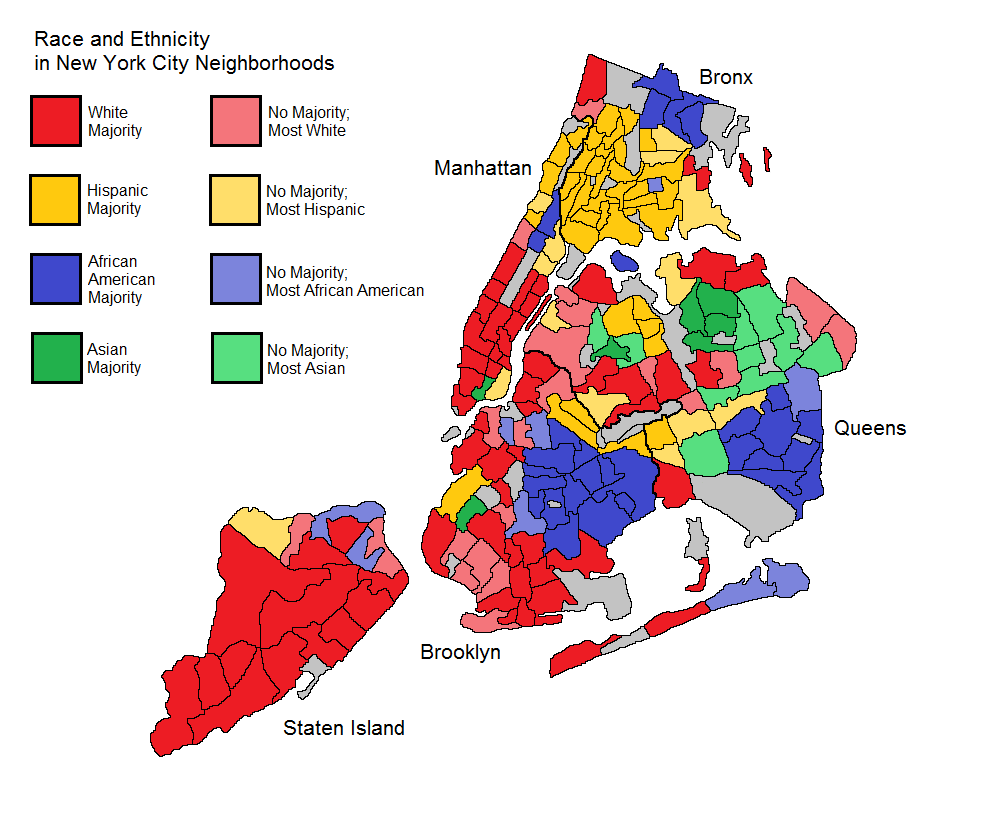



 [2] Ces biais ont été mis en évidence par Michel Forsé et Maxime Parodi dans « La Ségrégation spatiale selon Schelling : la perversité est ailleurs », *Document de Travail*, OFCE, 2006

## **Bilan du projet** <a class="anchor" id="seventh-bullet"></a>

### Répartition du travail : 

Après élaboration du plan de travail, nous avons chacun codé la simulation sur deux google colabs. Nous avons ensuite mis en commun les codes pour sélectionner le meilleur des deux. Puis, alors que Marie-Olive s'est occupée de mettre au propre le code sélectionné, Simon s'est chargé de produire la partie numérique du projet. Puis nous avons finalisé notre projet en rédigeant le bilan.

### Difficultés rencontrées : 

Nous avons rencontré un certain nombre de difficultés dans la programmation de notre modèle. L'une des premières difficultés a été de bien respecter les index notamment lorsqu'un ménage se situe sur une bordure de la ville. 

Une deuxième difficulté a été la création de matrice couleur qui est une méthode que nous n'avions jamais rencontrée.

Nous avons eu du mal également à sélectionner quelles statistiques seraient les plus pertinentes pour l'observation de notre modèle. 

Finalement, le modèle créé est  lourd informatiquement et prend donc beaucoup de temps à tourner. En effet, si créer la ville et la ségréguer prend entre $30$ secondes et $1$ minute, réaliser les statistiques sur de nombreuses villes peut prendre entre $30$ minutes et $1$ heure. Cela limite les possibilités d'expérimentation sur un grand nombre de villes. Ainsi, il aurait été intéressant de construire un indicateur de ségrégation : si c'est possible de le faire sur un petit échiquier, le faire plusieurs fois sur une ville de $1000$ habitants aurait pris un temps assez important. 

### Bilan de Marie-Olive :

Venant de CPGE MP, ce projet a pour moi été l'occasion d'approfondir ma connaissance des bibliothèques `numpy`, `pandas` et surtout `matplotlib`(notamment avec la mise en couleur de la ville). La partie la plus enrichissante du projet a été pour moi l'élaboration du plan de travail. En effet, habituellement confrontée à des TDs qui me guident dans les différentes étapes à suivre, j'ai ici été obligée à être plus autonome et à choisir quels algorithmes j'allais coder. 

### Bilan de Simon : 

Provenant de CPGE BL, je n'avais jamais codé avant la ${1}^{ière}$ année de l'ENSAE. Ce projet m'a vraiment permis de m'améliorer en travaillant sur un projet personnel qui me tenait vraiment à coeur voulant par la suite m'orienter vers l'économie géographique. J'ai beaucoup appris sur le code notamment sur la création et l'utilisation des classes ainsi que sur la création de matrice couleur. La répartition du travail avec Marie-Olive de façon à ce que chacun fasse l'ensemble du code puis que l'on garde le meilleur m'a permis de m'impliquer pleinement à chaque étape du code. 

### Pistes d'extensions possibles : 

Nous avons réfléchis à un certain nombre d'extensions possibles comme par exemple l'implémentation d'un prix du loyer à chaque case et d'un revenu à chaque groupe (en faisant une matrice ayant pour coefficient une liste de longueur $2$ contenant le revenu du ménage et le prix du loyer). Ainsi on aurait pu obtenir le phénomène de gradient. 

Nous avons également réfléchi à mettre des seuils de tolérance différents selon les groupes (notamment dans le cas d'un ségrégation sociale). 

## **Documentation** <a class="anchor" id="eighth-bullet"></a>

### Documentation de la classe `city`: <a class="anchor" id="ninth-bullet"></a>

[Retour](#third-bullet)

#### `init`: 

La classe `city` prend en arguments: 
- le nombre de ménages $N$. $N$ est un entier au moins égal à $1$. 
- le nombre minimal de logements vacants $n$. $n$ est un entier au moins égal à $1$.
- la liste `social_classes` contenant la proportion de chaque classe sociale. Par exemple la liste `[50.34, 20, 29.44]` indique que $50.34\%$ des ménages appartiennent à la première classe sociale, $20\%$ des ménages appartiennent à la deuxième classe sociale et $29.44\%$ des ménages appartiennent à la dernième classe sociale. Il faudra être attentif à ce que lorsque l'on somme toutes les proportions, on obtienne bien $100$. De plus, on ne pourra pas avoir plus de $10$ classes sociales dans notre ville. 

[Retour](#third-bullet)

#### `multiples`:

La fonction `multiples` prend en arguments $N$ et $n$ et renvoie une liste contenant tous les multiples de $N+n$. Elle permettra par la suite d'obtenir les dimensions de la matrice de la ville. 

[Retour](#third-bullet)

#### `city_dimensions` : 

La fonction `city_dimensions` prend en arguments $N$ et $n$, fait appel à la fonction `multiples`et renvoie une liste de deux éléments contenant les dimensions de la matrice de la ville. Les dimensions seront telles que : 
- la matrice de la ville soit la plus "*carrée*" possible (on prend les multiples les plus "*médians*").
- les dimensions soient au moins égales à $3$ (pour que l'on puisse comparer pour les points intérieurs avec les voisins en haut, en bas, à gauche et à droite). Si cette condition n'est pas respectée, on augmente de $1$ la valeur de $n$ jusqu'à obtenir des dimensions pertinentes. 

[Retour](#third-bullet)

#### `city_matrix`:

La fonction `city_matrix` prend en arguments $N$, $n$ et `social_classes` et renvoie une matrice de taille `city_dimensions(N,n)[0]`*`city_dimensions(N,n)[1]`. La matrice contiendra au moins $n$ zéros (correspondant aux logements vacants), et au plus $N$ ménages répartis au mieux selon `social_classes`.

Par exemple si $N = 1000$, $n = 50$ et `social_classes`$=[50.34, 20, 29.66]$ on récupèrera une matrice de taille $35*30$ contenant $503$ ménages appartenant à la première classe sociale, $200$ ménages appartenant à la deuxième classe sociale, $296$ appartenant à la troisième classe sociale et $51$ logements vacants.

[Retour](#third-bullet)

### Documentation de la fonction `colored_city` : 

La fonction `colored_city` prend en arguments une matrice (correspondant à notre ville), `nb_figure` le numéro de la figure et `year` l'année à laquelle on observe la ville et renverra une figure colorée correspondant à notre ville avec ses classes sociales et ses logements vacants (en blanc).

### Documentation de la classe `segregation`: <a class="anchor" id="eleventh-bullet"></a>

[Retour](#fourth-bullet)

#### `init`: 

La classe `segregation` prend en arguments: 
- la matrice de la ville initiale `city`. La matrice doit être comme décrite dans la classe `city`. 
- le seuil de tolérance $\mu$ qui sera un réel compris entre $0$ et $1$. Plus $\mu$ est élevé, plus tolérants sont les habitants quant à la classe sociale de leurs voisins. 
- le nombre d'années `nb_years` sur laquelle se déroulera la simulation. `nb_years` sera un entier strictement positif. 

[Retour](#fourth-bullet)

#### `unsatisfaction`: 

La fonction `unsatisfaction` prend en arguments la matrice de la ville `city`, le seuil de tolérance $\mu$, les coordonnées d'un logement occupé ${i}_{0}$ et ${j}_{0}$, et les coordonnées d'un logement quelconque ${i}_{1}$ et ${j}_{1}$ avec ${i}_{0}$, ${j}_{0}$, ${i}_{1}$ et ${j}_{1}$ des entiers positifs ne dépassant pas les dimensions de la matrice de la ville `city`.

Elle renvoit un booléen qui indique si le ménage considéré en $({i}_{0},{j}_{0})$ est insatisfait dans le logement $({i}_{1},{j}_{1})$ (`True` : le ménage n'est pas satisfait ; `False`: le ménage est satisfait). 

La satisfaction sera évaluée de la manière suivante :
- $(1)$ : on compte le nombre de voisins de $({i}_{1},{j}_{1})$ (i.e. les cases qui sont autour de $({i}_{1},{j}_{1})$) qui sont des logements occupés. 
- $(2)$ : parmi ces logements occupés, on compte le nombre de ménages qui appartiennent à la même classe sociale que $({i}_{0},{j}_{0})$.
- Si $\frac{(2)}{(1)} < \mu$, il n'y a pas trop de ménages qui appartiennent à une classe sociale différente de celle $({i}_{0},{j}_{0})$ autour de $({i}_{1},{j}_{1})$. Le ménage $({i}_{0},{j}_{0})$ est donc satisfait dans $({i}_{1},{j}_{1})$, on renvoie `False`. Sinon, le ménage $({i}_{0},{j}_{0})$ n'est pas satisfait dans $({i}_{1},{j}_{1})$, on renvoie `True`. 

[Retour](#fourth-bullet)

#### `moves`:

La fonction `moves` prend en arguments la matrice de la ville `city`, le seuil de tolérance $\mu$, et le nombre de ménages ayant déjà déménagé dans l'année `nb_moving`. Elle renvoie le nombre `nb_moving` de déménagements ayant eu lieu dans l'année.


Chaque semaine, un ménage (choisi au hasard) évalue sa situation actuelle; s'il n'est pas satisfait, il évalue quelle serait sa situation dans un logement vacant (choisi au hasard). S'il évalue qu'il serait satisfait dans ce logement, il déménage. Le cas échéant, la fonction modifie la matrice de la ville `city` et augmente de $1$ le nombre `nb_moving` de déménagements ayant eu lieu dans l'année.

[Retour](#fourth-bullet)

#### `segregation_one_year`:

La fonction `segregation_one_year` prend en arguments la matrice de la ville `city`, le seuil de tolérance $\mu$ et fait appel $52$ fois (c'est-à-dire chaque semaine de l'année) à la fonction `moves`. 

Elle modifie la `city` selon le phénomène de ségrégation sociale qui a eu lieu pendant les $52$ semaines de l'année et renvoie le nombre total de déménagements `nb_moving` qui ont eu lieu durant l'année. 

[Retour](#fourth-bullet)


#### `segregation_many_years` : 

La fonction `segregation_many_years` prend en arguments la matrice de la ville `city`, le seuil de tolérance $\mu$, le nombre d'années `nb_years` sur lesquelles se déroule la simulation ainsi qu'un booléen `animation`qui indique si l'on souhaite afficher les villes initiale et finale ; elle fait appel `nb_years` fois à la fonction `segregation_one_year` ainsi qu'à la fonction `colored_city`.

Elle modifie la matrice de la ville `city`, affiche la ville initiale ainsi que la ville au bout de `nb_years` années si `animation` $= True$ et renvoie une liste contenant pour chaque année, le nombre de déménagements ayant eu lieu dans l'année. 

[Retour](#fourth-bullet)

### Documentation de la fonction `find_stationary` : 

La fonction `find_stationary` prend en argument la liste `list_nb_moving` (liste contenant pour chaque année, le nombre de déménagements ayant eu lieu dans l'année) et l'année de l'état stationnaire de la ville. 